# Nsynth dataset

Reference: https://magenta.tensorflow.org/datasets/nsynth#format

### Parsing the JSON metafiles to a DataFrame

In [1]:
import pandas as pd
import numpy as np
import librosa
import os
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating path variables
TRAIN_PATH = "./nsynth/nsynth-train" 
TEST_PATH = "./test" 
VALID_PATH = "./valid"

In [3]:
# Loading metadata from training, test and validation

with open(os.path.join(TRAIN_PATH, "examples.json"), 'r') as f:
    train_data = json.load(f)
#with open(os.path.join(TEST_PATH, "examples.json"), 'r') as f:
#    test_data = json.load(f)
#with open(os.path.join(VALID_PATH, "examples.json"), 'r') as f:
#    distros_dict = json.load(f)

In [4]:
df_train = pd.read_json(os.path.join(TRAIN_PATH, "examples.json"), orient='index')
df_train['file'] = df_train.index
df_train.reset_index(drop=True, inplace=True)
df_train["stage"] = "train"
'''
df_test = pd.read_json(os.path.join(TEST_PATH, "examples.json"), orient='index')
df_test['file'] = df_test.index
df_test.reset_index(drop=True, inplace=True)
df_test["stage"] = "test"

df_valid = pd.read_json(os.path.join(VALID_PATH, "examples.json"), orient='index')
df_valid['file'] = df_valid.index
df_valid.reset_index(drop=True, inplace=True)
df_valid["stage"] = "valid"
'''

'\ndf_test = pd.read_json(os.path.join(TEST_PATH, "examples.json"), orient=\'index\')\ndf_test[\'file\'] = df_test.index\ndf_test.reset_index(drop=True, inplace=True)\ndf_test["stage"] = "test"\n\ndf_valid = pd.read_json(os.path.join(VALID_PATH, "examples.json"), orient=\'index\')\ndf_valid[\'file\'] = df_valid.index\ndf_valid.reset_index(drop=True, inplace=True)\ndf_valid["stage"] = "valid"\n'

In [5]:
df_train = pd.read_json(os.path.join(TRAIN_PATH, "examples.json"), orient='index')
df_train['file'] = df_train.index
df_train.reset_index(drop=True, inplace=True)
df_train.head()

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,qualities_str,instrument_source_str,velocity,instrument_family,instrument,qualities,file
0,16629,16000,82,0,guitar,guitar_acoustic_001,guitar_acoustic_001-082-050,[percussive],acoustic,50,3,39,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",guitar_acoustic_001-082-050
1,168243,16000,108,2,bass,bass_synthetic_120,bass_synthetic_120-108-050,[percussive],synthetic,50,0,881,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]",bass_synthetic_120-108-050
2,88495,16000,50,1,organ,organ_electronic_120,organ_electronic_120-050-127,[],electronic,127,6,979,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",organ_electronic_120-050-127
3,146382,16000,26,1,guitar,guitar_electronic_021,guitar_electronic_021-026-025,"[fast_decay, percussive]",electronic,25,3,346,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0]",guitar_electronic_021-026-025
4,244275,16000,79,1,organ,organ_electronic_011,organ_electronic_011-079-075,[bright],electronic,75,6,188,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]",organ_electronic_011-079-075


In [23]:
df_inst = df_train[df_train['instrument'] == 39]

In [7]:
file_1 = df_train[(df_train['instrument'] == 256)&(df_train['velocity'] == 100)]['file']
file_2 = df_train[(df_train['pitch'] == 50)&(df_train['velocity'] == 75)]['file']
file_3 = df_train[(df_train['pitch'] == 55)&(df_train['velocity'] == 50)]['file']

In [8]:
file_1

8380      reed_acoustic_026-047-100
12163     reed_acoustic_026-023-100
18036     reed_acoustic_026-022-100
23019     reed_acoustic_026-032-100
23577     reed_acoustic_026-036-100
25210     reed_acoustic_026-029-100
30565     reed_acoustic_026-042-100
32389     reed_acoustic_026-030-100
40992     reed_acoustic_026-041-100
56788     reed_acoustic_026-046-100
58555     reed_acoustic_026-037-100
76596     reed_acoustic_026-045-100
82475     reed_acoustic_026-039-100
94036     reed_acoustic_026-024-100
100597    reed_acoustic_026-021-100
111000    reed_acoustic_026-026-100
186796    reed_acoustic_026-040-100
195891    reed_acoustic_026-043-100
198343    reed_acoustic_026-038-100
216498    reed_acoustic_026-031-100
220328    reed_acoustic_026-035-100
227455    reed_acoustic_026-048-100
231229    reed_acoustic_026-033-100
231846    reed_acoustic_026-028-100
240502    reed_acoustic_026-027-100
246130    reed_acoustic_026-025-100
258917    reed_acoustic_026-044-100
286711    reed_acoustic_026-

In [26]:
file_2

55782    guitar_acoustic_001-050-075
Name: file, dtype: object

In [27]:
file_3

107662    guitar_acoustic_001-055-050
Name: file, dtype: object

In [18]:
df_intru = df_train[df_train['instrument'] == 39]
print(df_intru['velocity'].unique())

[ 50 127  75 100  25]


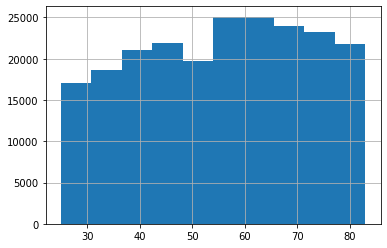

In [6]:
df_train = df_train[(df_train['pitch'] < 84)& ( df_train['pitch'] > 24)]
df_train['pitch'].hist()

Write file names into a separated txt file.

In [9]:
path = "./data/nsynth/train/audio/"
with open("training_files.txt", 'w') as f:
    for file in list(df_train['file']):
        f.write(path + file + ".wav" + "\n")

In [7]:
df = pd.concat([df_train ,df_test, df_valid])
assert len(df) == len(df_train) + len(df_test) + len(df_valid)

NameError: name 'df_train' is not defined

In [ ]:
df.to_csv("examples.csv", index=False)

# GANSynth

In [ ]:
df_train['instrument_family_str'].unique()

In [ ]:
instr = ['mallet','string','brass','reed', 'flute']
gan_synth_df = df_train[df_train['instrument_family_str'].isin(instr)]

In [35]:
len(gan_synth_df['instrument'].unique())

352

1025